In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

import matplotlib.pyplot as plt
import japanize_matplotlib # 追加
import numpy as np
import pandas as pd

## データの読み込みと確認

In [39]:
# データの読み込み
data = load_breast_cancer()
X = data.data
y = data.target  # 悪性: 0, 良性: 1
data_df = pd.DataFrame(X, columns=data.feature_names)
data_df['target'] = data.target
print("データの基本情報:\n")
print(data_df.info())
print("\nデータの統計量:\n")
print(data_df.describe())

print("\nデータの一部を表示:\n")
print(data_df.head())

# データの変数: 項目名の出力
print("\nデータの変数:\n")
print(data_df.columns.tolist())

データの基本情報:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness erro

## SVMを実施

In [40]:
# データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCAによる次元削減（2次元に圧縮して可視化）
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVMの学習
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y_train)

# 決定境界の可視化用にメッシュグリッドを作成
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# メッシュグリッド上でのSVM予測
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 学習データに基づく分類結果
y_pred_train = svm.predict(X_train_pca)

# 分類評価指標の計算
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='binary')  # 二値分類用
classification_rep = classification_report(y_train, y_pred_train, target_names=['悪性', '良性'])

# 領域ごとのデータを抽出
region_0 = X_train_pca[y_pred_train == 0]  # 悪性領域に分類
region_1 = X_train_pca[y_pred_train == 1]  # 良性領域に分類

# 領域ごとのデータを表示
region_0_df = pd.DataFrame(region_0, columns=['主成分1', '主成分2'])
region_1_df = pd.DataFrame(region_1, columns=['主成分1', '主成分2'])

# 評価指標の表示
print("=== 分類精度と評価指標 ===")
print(f"正解率: {accuracy:.2f}")
print(f"F1スコア: {f1:.2f}")
print("\n=== 分類レポート ===")
print(classification_rep)

=== 分類精度と評価指標 ===
正解率: 0.91
F1スコア: 0.93

=== 分類レポート ===
              precision    recall  f1-score   support

          悪性       0.93      0.83      0.88       149
          良性       0.91      0.96      0.93       249

    accuracy                           0.91       398
   macro avg       0.92      0.90      0.90       398
weighted avg       0.91      0.91      0.91       398



## 結果を出力

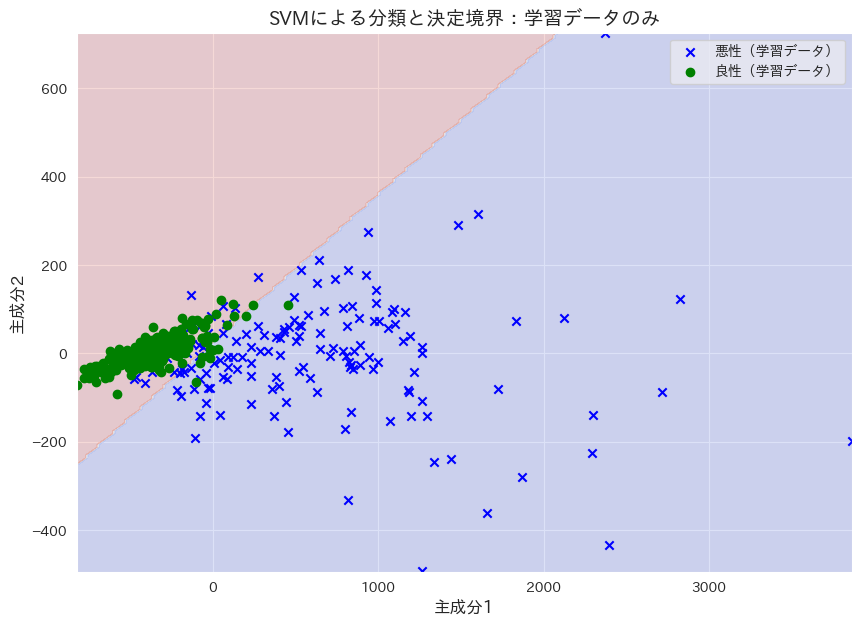

In [44]:
# プロット
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1],
            c='blue', label='悪性（学習データ）', marker='x')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1],
            c='green', label='良性（学習データ）', marker='o')

plt.title('SVMによる分類と決定境界：学習データのみ', fontsize=14)
plt.xlabel('主成分1', fontsize=12)
plt.ylabel('主成分2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

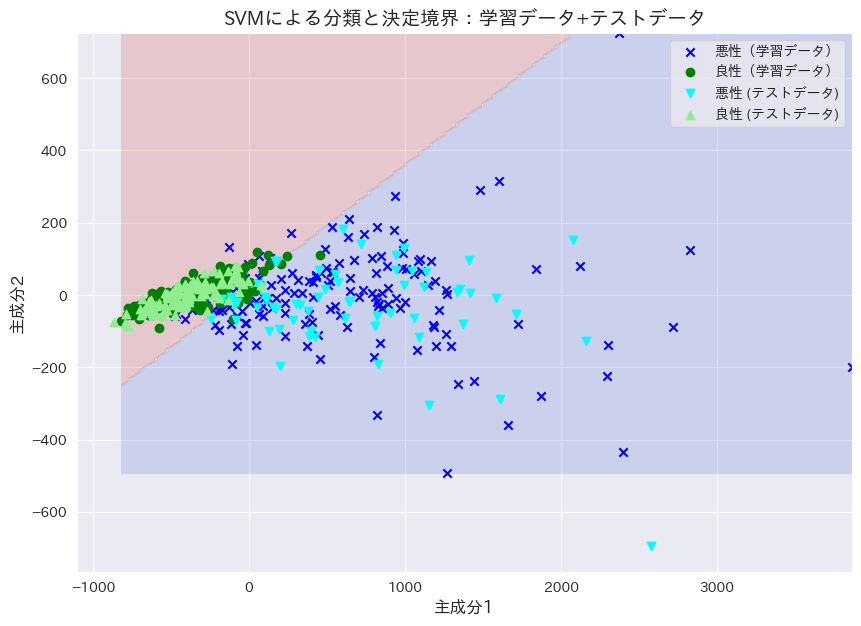

In [43]:
# プロット
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1],
            c='blue', label='悪性（学習データ）', marker='x')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1],
            c='green', label='良性（学習データ）', marker='o')

plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1],
            c='cyan', label='悪性 (テストデータ)', marker='v')

plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1],
            c='lightgreen', label='良性 (テストデータ)', marker='^')

plt.title('SVMによる分類と決定境界：学習データ+テストデータ', fontsize=14)
plt.xlabel('主成分1', fontsize=12)
plt.ylabel('主成分2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()